# The Keyword Replacement Algorithm

### Implementation of the first algorithm

In [43]:
import time
import matplotlib.pyplot as plt
import numpy as np
from Milestone3 import load_acronyms, load_reviews, replace_acronyms, test1, test2

In [44]:
# Load acronyms and reviews
acronym_list, expansion_list = load_acronyms('data/acronyms/slang.csv')
review_list = load_reviews('data/reviews')
test1_review_list = load_reviews('data/test1reviews')
test2_review_list = load_reviews('data/test2reviews')

Test 1 results:

In [45]:
#Test 1
modified_reviews, execution_time, test_result = test1(test1_review_list, acronym_list, expansion_list)
print(f"Original Reviews: {test1_review_list}")
print(f"Modified Reviews: {modified_reviews}")
print(f"Execution time: {execution_time:.3f}")
print(f"Test result: {test_result}")

Original Reviews: ['I will brb', 'smh gtg np', 'SMH GTG NP']
Modified Reviews: ['I will be right back', 'shaking my head got to go no problem', 'shaking my head got to go no problem']
Execution time: 0.000
Test result: Success


Test 2 results:

In [46]:
#Test 2
review_count, execution_time, test_result = test2(test2_review_list, acronym_list, expansion_list)
print(f"Review count: {review_count}")
print(f"Execution time: {execution_time:.3f}")
print(f"Test result: {test_result}")

Review count: 9163
Execution time: 7.943
Test result: Success


### Time complexity analysis

In [47]:
# Define function to measure runtime
def measure_runtime(func, *args):
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

In [48]:
# Define list of input sizes to test
input_sizes = [25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000]

In [49]:
# Define empty lists to store runtimes and expected runtimes
runtimes = []
expected_runtimes = []

In [50]:
# Iterate over input sizes and measure runtimes
for size in input_sizes:
    reviews = review_list[:size]
    runtime = measure_runtime(replace_acronyms, reviews, acronym_list, expansion_list)
    runtimes.append(runtime)
    expected_runtime = (size * len(acronym_list)) * 0.00000025
    expected_runtimes.append(expected_runtime)

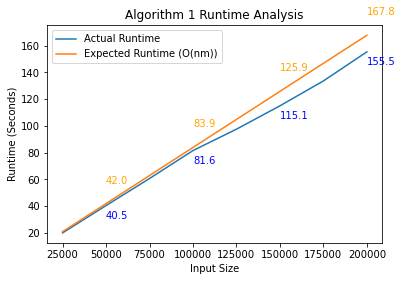

In [51]:

# Plot runtimes and expected runtimes
plt.plot(input_sizes, runtimes, label='Actual Runtime')
for index in range(1, len(input_sizes), 2):
    plt.text(input_sizes[index], runtimes[index] - 10, round(runtimes[index], 1), color = "blue")
plt.plot(input_sizes, expected_runtimes, label='Expected Runtime (O(nm))')
for index in range(1, len(input_sizes), 2):
    plt.text(input_sizes[index], expected_runtimes[index] + 15, round(expected_runtimes[index], 1), color = "orange")
plt.xlabel('Input Size')
plt.ylabel('Runtime (Seconds)')
plt.title('Algorithm 1 Runtime Analysis')
plt.legend()
plt.show()